<a href="https://colab.research.google.com/github/AnimeshKulshrestha/Text-Processing-on-textbook/blob/main/Contingent_zeroes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries and downloading required packages

In [10]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import defaultdict
import operator

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#Defining necessary functions

###Defining a function for basic text preprocessing

In [11]:
def text_preprocessing(raw):
  # lower case
  raw = raw.lower()
  # remove numbers
  raw = re.sub(r'\d+', '', raw)
  # remove punctuation
  raw = re.sub(r'[^\w\s]', '', raw)
  # white space removal
  raw = raw.strip()
  #removing any non alphanumeric characters
  raw = re.sub('\W', ' ', raw)  
  #removing extra white spaces
  raw = re.sub('\s+', ' ', raw) 
  #removing chapter numbers and running sections
  raw = re.sub('chapter \w*', '', raw)   
  return (raw)

###Function to calculate frequency 

In [12]:
def freq(tokens):
# frequency of tokens
  freq = {}
  for t in tokens:
    if t in freq:
      freq[t]+=1
    else:
      freq[t]=1
  return freq

###Function to plot frequency graph

In [13]:
def freq_graph(tokens):
#frequency graph
  FreqDist(tokens)
  all_fdist = FreqDist(tokens).most_common(60)

  all_fdist = pd.Series(dict(all_fdist))

  fig, ax = plt.subplots(figsize=(10,10))

  all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
  plt.xticks(rotation=90)

###Function to generate and display word cloud

In [14]:
def word_cloud(freq):
  wc = WordCloud(height = 1000, width = 1500, background_color = 'white', max_words = 1000)
  wc.generate_from_frequencies(freq)
  return wc

In [15]:
def showCloud(cloud):
    plt.figure(figsize=(10,10))
    plt.imshow(cloud)
    plt.axis('off')

###Function to remove stop words

In [16]:
def stopwords_text(text):
  stop_words = set(nltk.corpus.stopwords.words('english'))
  x = 65
  y = 97
  for i in range(26):
    stop_words.add(chr(x))
    stop_words.add(chr(y))
    x += 1
    y += 1
  tokens = word_tokenize(text)
  result = [i for i in tokens if not i in stop_words]
  return result

###Function to count words

In [17]:
words ={}
def word_counter(text):
  words.clear()
  for word in text.split():
    if(len(word)not in words ):
      words[len(word)]=1
    else:
      words[len(word)]+=1

#Loading and Frequency Analysis a text book

###Opening a txt file

####Text T1

In [18]:
f = open('/content/Stinson-Paterson_CryptographyTheoryAndPractice.txt')
text = f.read()

####Text T2

In [19]:
f2 = open('/content/Software-Engineering-9th-Edition-by-Ian-Sommerville.txt')
text2 = f2.read()

###Text Preprocessing

####for T1

In [20]:
t1 = text_preprocessing(text)

####for T2

In [21]:
t2 = text_preprocessing(text2)

###Tokenisation

####T1

In [22]:
t1tokens = nltk.word_tokenize(t1)
t1tokens

['cryptography',
 'theory',
 'and',
 'practice',
 'fourth',
 'edition',
 'textbooks',
 'in',
 'mathematics',
 'series',
 'editors',
 'al',
 'boggess',
 'and',
 'ken',
 'rosen',
 'mathematical',
 'modeling',
 'for',
 'business',
 'analytics',
 'william',
 'p',
 'fox',
 'elementary',
 'linear',
 'algebra',
 'james',
 'r',
 'kirkwood',
 'and',
 'bessie',
 'h',
 'kirkwood',
 'applied',
 'functional',
 'analysis',
 'third',
 'edition',
 'j',
 'tinsley',
 'oden',
 'and',
 'leszek',
 'demkowicz',
 'an',
 'introduction',
 'to',
 'number',
 'theory',
 'with',
 'cryptography',
 'second',
 'edition',
 'james',
 'r',
 'kraft',
 'and',
 'lawrence',
 'washington',
 'mathematical',
 'modeling',
 'branching',
 'beyond',
 'calculus',
 'crista',
 'arangala',
 'nicolas',
 's',
 'luke',
 'and',
 'karen',
 'a',
 'yokley',
 'elementary',
 'differential',
 'equations',
 'second',
 'edition',
 'charles',
 'roberts',
 'elementary',
 'introduction',
 'to',
 'the',
 'lebesgue',
 'integral',
 'steven',
 'g',
 'kr

In [23]:
print("No. of tokens in T1 :")
print(len(t1tokens))

No. of tokens in T1 :
192887


####T2

In [24]:
t2tokens = nltk.word_tokenize(t2)
t2tokens

['software',
 'engineering',
 'ninth',
 'edition',
 'ian',
 'sommerville',
 'addisonwesley',
 'boston',
 'columbus',
 'indianapolis',
 'new',
 'york',
 'san',
 'francisco',
 'upper',
 'saddle',
 'river',
 'amsterdam',
 'cape',
 'town',
 'dubai',
 'london',
 'madrid',
 'milan',
 'munich',
 'paris',
 'montreal',
 'toronto',
 'delhi',
 'mexico',
 'city',
 'são',
 'paulo',
 'sydney',
 'hong',
 'kong',
 'seoul',
 'singapore',
 'taipei',
 'tokyo',
 'editorial',
 'director',
 'marcia',
 'horton',
 'editor',
 'in',
 'chief',
 'michael',
 'hirsch',
 'acquisitions',
 'editor',
 'matt',
 'goldstein',
 'editorial',
 'assistant',
 'chelsea',
 'bell',
 'managing',
 'editor',
 'jeff',
 'holcomb',
 'senior',
 'production',
 'project',
 'manager',
 'marilyn',
 'lloyd',
 'director',
 'of',
 'marketing',
 'margaret',
 'waples',
 'marketing',
 'coordinator',
 'kathryn',
 'ferranti',
 'senior',
 'manufacturing',
 'buyer',
 'carol',
 'melville',
 'text',
 'designer',
 'susan',
 'raymond',
 'cover',
 'art',


In [25]:
print("No. of tokens in T2 :")
print(len(t2tokens))

No. of tokens in T2 :
287538


###Freqency analysis

####Calculating frequencies

####for T2

In [26]:
t1freq = freq(t1tokens)
print(t1freq)

{'cryptography': 551, 'theory': 367, 'and': 4361, 'practice': 324, 'fourth': 5, 'edition': 30, 'textbooks': 4, 'in': 3292, 'mathematics': 11, 'series': 7, 'editors': 1, 'al': 7, 'boggess': 1, 'ken': 1, 'rosen': 1, 'mathematical': 33, 'modeling': 3, 'for': 1859, 'business': 5, 'analytics': 1, 'william': 2, 'p': 1884, 'fox': 1, 'elementary': 19, 'linear': 185, 'algebra': 13, 'james': 4, 'r': 993, 'kirkwood': 2, 'bessie': 1, 'h': 638, 'applied': 23, 'functional': 1, 'analysis': 54, 'third': 36, 'j': 633, 'tinsley': 1, 'oden': 1, 'leszek': 1, 'demkowicz': 1, 'an': 1232, 'introduction': 45, 'to': 3790, 'number': 296, 'with': 675, 'second': 134, 'kraft': 1, 'lawrence': 1, 'washington': 3, 'branching': 1, 'beyond': 3, 'calculus': 26, 'crista': 1, 'arangala': 1, 'nicolas': 1, 's': 799, 'luke': 1, 'karen': 1, 'a': 6754, 'yokley': 1, 'differential': 45, 'equations': 82, 'charles': 3, 'roberts': 1, 'the': 10758, 'lebesgue': 1, 'integral': 3, 'steven': 3, 'g': 509, 'krantz': 1, 'methods': 39, 'lib

####for T2

In [27]:
t2freq = freq(t2tokens)
print(t2freq)

{'software': 3409, 'engineering': 808, 'ninth': 1, 'edition': 40, 'ian': 4, 'sommerville': 32, 'addisonwesley': 120, 'boston': 48, 'columbus': 1, 'indianapolis': 2, 'new': 553, 'york': 38, 'san': 6, 'francisco': 3, 'upper': 12, 'saddle': 9, 'river': 9, 'amsterdam': 5, 'cape': 1, 'town': 4, 'dubai': 1, 'london': 14, 'madrid': 1, 'milan': 1, 'munich': 1, 'paris': 2, 'montreal': 1, 'toronto': 2, 'delhi': 1, 'mexico': 1, 'city': 4, 'são': 1, 'paulo': 1, 'sydney': 1, 'hong': 4, 'kong': 3, 'seoul': 1, 'singapore': 1, 'taipei': 1, 'tokyo': 1, 'editorial': 2, 'director': 3, 'marcia': 1, 'horton': 1, 'editor': 8, 'in': 4985, 'chief': 7, 'michael': 1, 'hirsch': 1, 'acquisitions': 2, 'matt': 1, 'goldstein': 1, 'assistant': 2, 'chelsea': 1, 'bell': 4, 'managing': 53, 'jeff': 1, 'holcomb': 1, 'senior': 20, 'production': 33, 'project': 640, 'manager': 79, 'marilyn': 1, 'lloyd': 1, 'of': 8592, 'marketing': 17, 'margaret': 1, 'waples': 1, 'coordinator': 1, 'kathryn': 1, 'ferranti': 1, 'manufacturing':

####Frequency graph of most frequent 60 words 

#####for T1

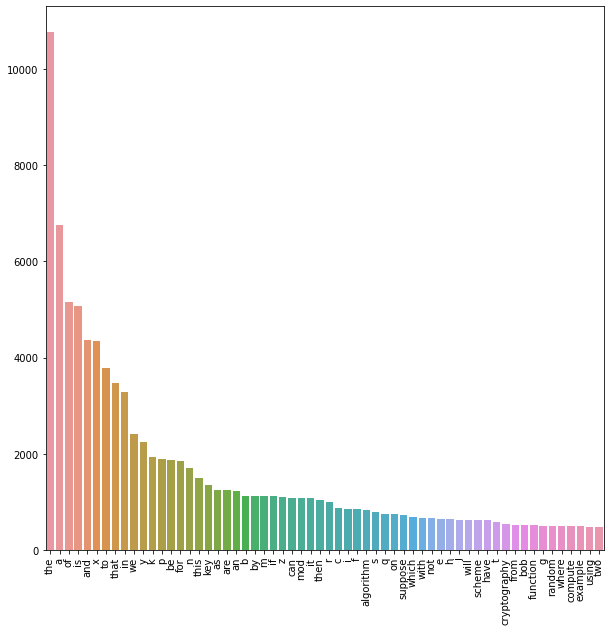

In [28]:
t1freq_graph = freq_graph(t1tokens)

#####for T2

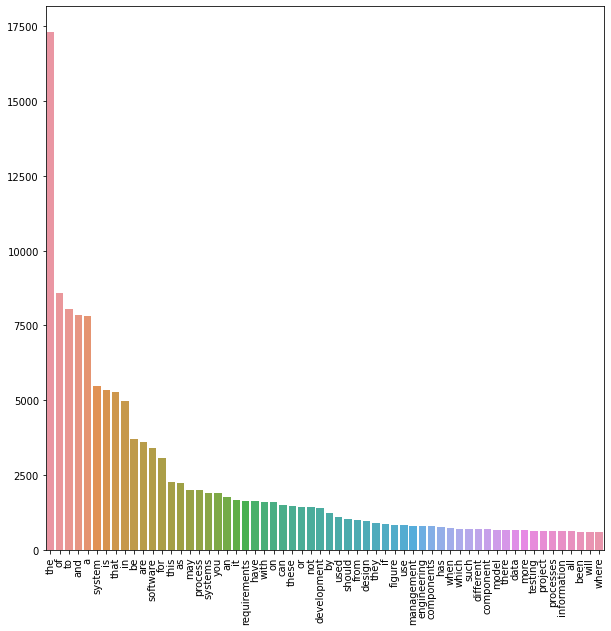

In [29]:
t2freq_graph = freq_graph(t2tokens)

###Generating word cloud without removing stopwords

####T1

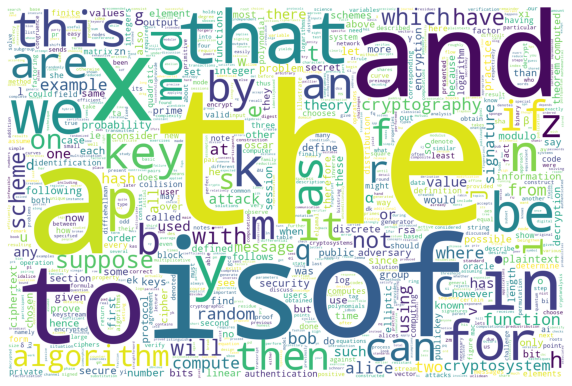

In [30]:
t1wordcloud = word_cloud(t1freq)
showCloud(t1wordcloud)

####T2

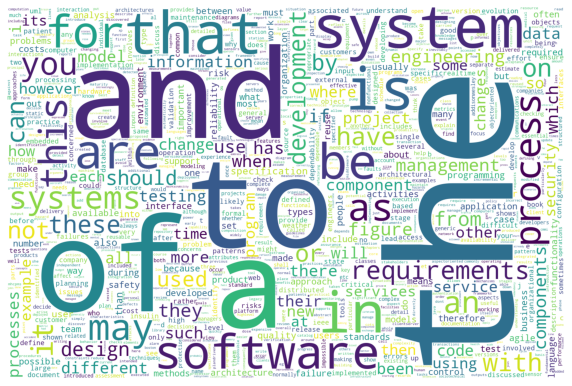

In [31]:
t2wordcloud = word_cloud(t2freq)
showCloud(t2wordcloud)

###Generating wordcloud without stopwords

####Removing stopwords

######T1

In [32]:
t1nostoptokens = stopwords_text(t1)

#####T2

In [33]:
t2nostoptokens = stopwords_text(t2)

####Frequency graph of most frequent 60 words after removing stopwords

---



#####T1

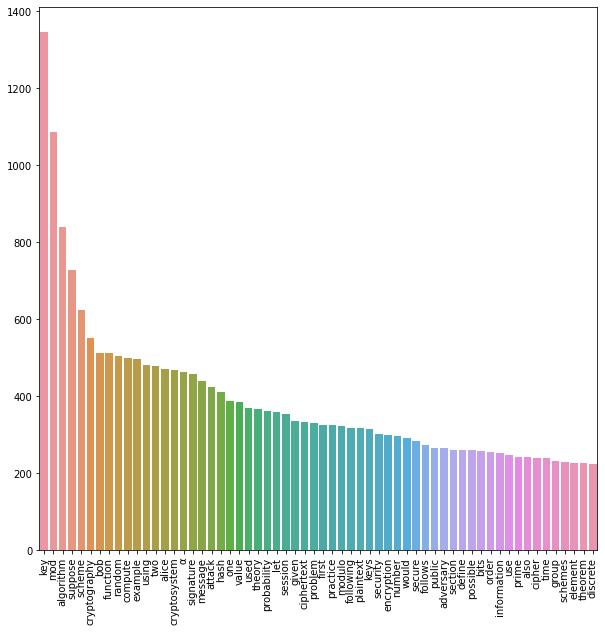

In [34]:
t1nostopfreq = freq(t1nostoptokens)
t1nostopfreq_graph = freq_graph(t1nostoptokens)

#####T2

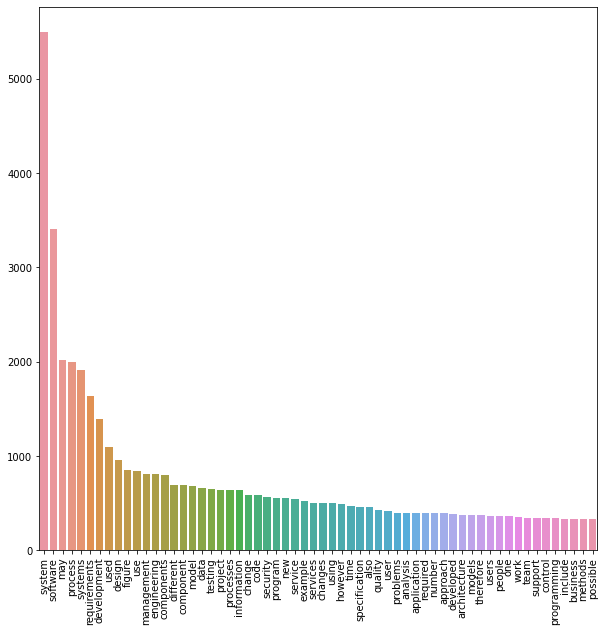

In [35]:
t2nostopfreq = freq(t2nostoptokens)
t2nostopfreq_graph = freq_graph(t2nostoptokens)

####Wordcloud after removing stopwords

#####T1

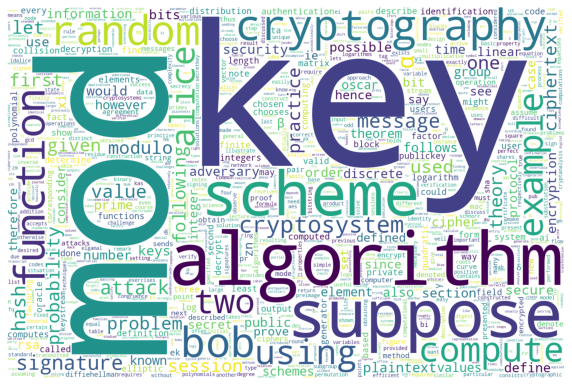

In [36]:
t1nostopwordcloud = word_cloud(t1nostopfreq)
showCloud(t1nostopwordcloud)

#####T2

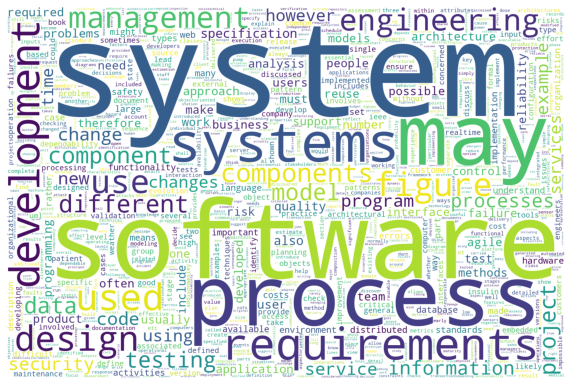

In [37]:
t2nostopwordcloud = word_cloud(t2nostopfreq)
showCloud(t2nostopwordcloud)

#Frequency relation with length of words

####T1

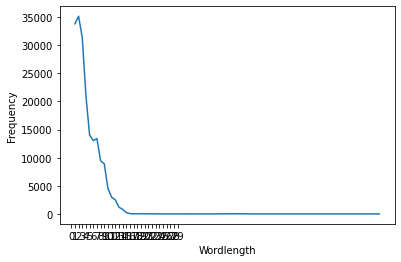

In [38]:
word_counter(t1)

list_count_t1 = sorted(words.items())
x1, y1 = zip(*list_count_t1)
plt.plot(x1, y1)
plt.xticks(range(0, 30))
plt.rcParams["figure.figsize"] = (15, 10)
plt.xlabel("Wordlength")
plt.ylabel("Frequency")
plt.show()

####T2

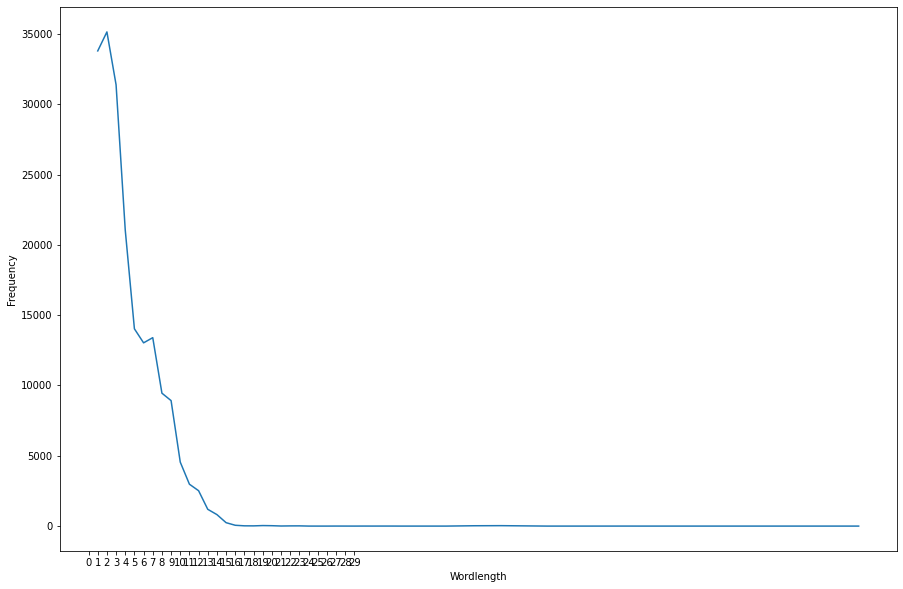

In [39]:
list_count_t2 = sorted(words.items())
x2, y2 = zip(*list_count_t2)
plt.plot(x2, y2)
plt.xticks(range(0, 30))
plt.rcParams["figure.figsize"] = (15, 10)
plt.xlabel("Wordlength")
plt.ylabel("Frequency")
plt.show()

#POS Tagging the contents of textbook

###Tagging words

####T1

In [40]:
tagged1 = nltk.pos_tag(t1tokens)
tagged1

[('cryptography', 'NN'),
 ('theory', 'NN'),
 ('and', 'CC'),
 ('practice', 'NN'),
 ('fourth', 'JJ'),
 ('edition', 'NN'),
 ('textbooks', 'NNS'),
 ('in', 'IN'),
 ('mathematics', 'NNS'),
 ('series', 'NN'),
 ('editors', 'NNS'),
 ('al', 'VBP'),
 ('boggess', 'NN'),
 ('and', 'CC'),
 ('ken', 'VB'),
 ('rosen', 'JJ'),
 ('mathematical', 'JJ'),
 ('modeling', 'NN'),
 ('for', 'IN'),
 ('business', 'NN'),
 ('analytics', 'NNS'),
 ('william', 'VBP'),
 ('p', 'JJ'),
 ('fox', 'NN'),
 ('elementary', 'JJ'),
 ('linear', 'JJ'),
 ('algebra', 'NN'),
 ('james', 'NNS'),
 ('r', 'VBP'),
 ('kirkwood', 'NN'),
 ('and', 'CC'),
 ('bessie', 'NN'),
 ('h', 'NN'),
 ('kirkwood', 'NN'),
 ('applied', 'VBD'),
 ('functional', 'JJ'),
 ('analysis', 'NN'),
 ('third', 'JJ'),
 ('edition', 'NN'),
 ('j', 'NN'),
 ('tinsley', 'NN'),
 ('oden', 'NN'),
 ('and', 'CC'),
 ('leszek', 'NN'),
 ('demkowicz', 'VBP'),
 ('an', 'DT'),
 ('introduction', 'NN'),
 ('to', 'TO'),
 ('number', 'NN'),
 ('theory', 'NN'),
 ('with', 'IN'),
 ('cryptography', 'JJ'),


####T2

In [ ]:
tagged2 = nltk.pos_tag(t2tokens)
tagged2

[('software', 'NN'),
 ('engineering', 'NN'),
 ('ninth', 'JJ'),
 ('edition', 'NN'),
 ('ian', 'JJ'),
 ('sommerville', 'NN'),
 ('addisonwesley', 'IN'),
 ('boston', 'NN'),
 ('columbus', 'NN'),
 ('indianapolis', 'VBP'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('san', 'JJ'),
 ('francisco', 'JJ'),
 ('upper', 'JJ'),
 ('saddle', 'NN'),
 ('river', 'NN'),
 ('amsterdam', 'JJ'),
 ('cape', 'NN'),
 ('town', 'NN'),
 ('dubai', 'JJ'),
 ('london', 'NN'),
 ('madrid', 'JJ'),
 ('milan', 'NN'),
 ('munich', 'JJ'),
 ('paris', 'NN'),
 ('montreal', 'NN'),
 ('toronto', 'IN'),
 ('delhi', 'JJ'),
 ('mexico', 'FW'),
 ('city', 'NN'),
 ('são', 'NN'),
 ('paulo', 'JJ'),
 ('sydney', 'NN'),
 ('hong', 'NN'),
 ('kong', 'NN'),
 ('seoul', 'NN'),
 ('singapore', 'NN'),
 ('taipei', 'JJ'),
 ('tokyo', 'JJ'),
 ('editorial', 'NN'),
 ('director', 'NN'),
 ('marcia', 'VBD'),
 ('horton', 'NN'),
 ('editor', 'NN'),
 ('in', 'IN'),
 ('chief', 'NN'),
 ('michael', 'NN'),
 ('hirsch', 'VBP'),
 ('acquisitions', 'NNS'),
 ('editor', 'NN'),
 ('matt', 'NN'

###Plotting the freqency bar graph for POS tags

####T1

In [ ]:
dict1 = {}
for a, b in tagged1:
    if(b not in dict1):
        dict1[b] = 1
    else:
        dict1[b] += 1

sorted_d1 = dict(sorted(dict1.items(), key=operator.itemgetter(1), reverse=True))


N = 20
out1 = dict(list(sorted_d1.items())[0: N])

plt.bar(out1.keys(), out1.values())
plt.xlabel('TAGS')
plt.ylabel('Count')
plt.show()

####T2

In [ ]:
dict2 = {}
for a, b in tagged2:
    if(b not in dict2):
        dict2[b] = 1
    else:
        dict2[b] += 1

sorted_d2 = dict(sorted(dict2.items(), key=operator.itemgetter(1), reverse=True))


N = 20
out1 = dict(list(sorted_d2.items())[0: N])

plt.bar(out1.keys(), out1.values())
plt.xlabel('TAGS')
plt.ylabel('Count')
plt.show()